In [9]:
pip install numpy==1.23.5

   ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/14.7 MB 7.6 MB/s eta 0:00:02
   --------- ------------------------------ 3.4/14.7 MB 8.7 MB/s eta 0:00:02
   -------------- ------------------------- 5.2/14.7 MB 8.4 MB/s eta 0:00:02
   ----------------- ---------------------- 6.3/14.7 MB 7.4 MB/s eta 0:00:02
   ------------------- -------------------- 7.1/14.7 MB 6.8 MB/s eta 0:00:02
   ---------------------- ----------------- 8.1/14.7 MB 6.5 MB/s eta 0:00:02
   ------------------------- -------------- 9.4/14.7 MB 6.5 MB/s eta 0:00:01
   ------------------------------ --------- 11.0/14.7 MB 6.5 MB/s eta 0:00:01
   ----------------------------------- ---- 12.8/14.7 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------  14.4/14.7 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 14.7/14.7 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
   

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.11.0 which is incompatible.


In [1]:
import tensorflow as tf

In [2]:
!python --version

Python 3.8.20


In [ ]:
pip install protobuf==3.20.3


In [ ]:
!protobuf --version

In [3]:
from tensorflow.keras.models import load_model

# loading model that was trained in attemtSecond.ipynb
model = load_model("trained_model.h5")

In [2]:
print(tf.__version__)

2.6.0


In [ ]:
pip install keras==2.6

In [28]:
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

# Define file paths for the training and test datasets

test_path = "/Users/milan/Downloads/test-20241208T185056Z-001/test"
train_path = "/Users/milan/Downloads/train-20241209T165103Z-001/train"

# Set image size, batch size, number of epochs, and learning rate
img_size = 224  # The size to which all images will be resized (224x224 pixels)
batch_size = 32  # Number of images per batch
epochs = 95  # Number of epochs to train the model
learning_rate = 0.0001  # Learning rate for the optimizer

# Data augmentation for training images to make the model more robust
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to the range [0, 1]
    rotation_range=30,  # Randomly rotate images up to 30 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,  # Apply random shear transformations
    zoom_range=0.2,  # Randomly zoom in/out on images by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=True,  # Randomly flip images vertically
    fill_mode="nearest"  # Fill missing pixels after transformations using the nearest pixel
)

# Create a generator for training data
train_generator = train_datagen.flow_from_directory(
    train_path,  # Directory containing training images organized by class
    target_size=(img_size, img_size),  # Resize all images to 224x224 pixels
    batch_size=batch_size,  # Number of images in each batch
    class_mode='categorical'  # Use categorical labels for classification
)

# Data preprocessing for the test images 
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize test images to the range [0, 1]

# Create a generator for test data
test_generator = test_datagen.flow_from_directory(
    test_path,  # Directory containing test images organized by class
    target_size=(img_size, img_size),  # Resize all images to 224x224 pixels
    batch_size=batch_size,  # Number of images in each batch
    class_mode='categorical'  # Use categorical labels for classification
)

Found 3536 images belonging to 14 classes.
Found 1184 images belonging to 14 classes.


In [33]:
import os

# Searching how many images there are in every class

class_image_count = {}

for class_name in os.listdir(test_path):
    class_path = os.path.join(test_path, class_name)
    if os.path.isdir(class_path):  
    
        num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_image_count[class_name] = num_images

for class_name, count in class_image_count.items():
    print(f"Class: {class_name}, Number of Images: {count}")


Class: Anthurium (Anthurium andraeanum), Number of Images: 91
Class: Chinese evergreen (Aglaonema), Number of Images: 103
Class: Chinese Money Plant (Pilea peperomioides), Number of Images: 77
Class: Christmas Cactus (Schlumbergera bridgesii), Number of Images: 62
Class: Daffodils (Narcissus spp.), Number of Images: 84
Class: Dumb Cane (Dieffenbachia spp.), Number of Images: 107
Class: Elephant Ear (Alocasia spp.), Number of Images: 65
Class: Hyacinth (Hyacinthus orientalis), Number of Images: 64
Class: Lilium (Hemerocallis), Number of Images: 96
Class: Lily of the valley (Convallaria majalis), Number of Images: 82
Class: Monstera Deliciosa (Monstera deliciosa), Number of Images: 108
Class: Prayer Plant (Maranta leuconeura), Number of Images: 80
Class: Snake plant (Sanseviera), Number of Images: 78
Class: ZZ Plant (Zamioculcas zamiifolia), Number of Images: 87


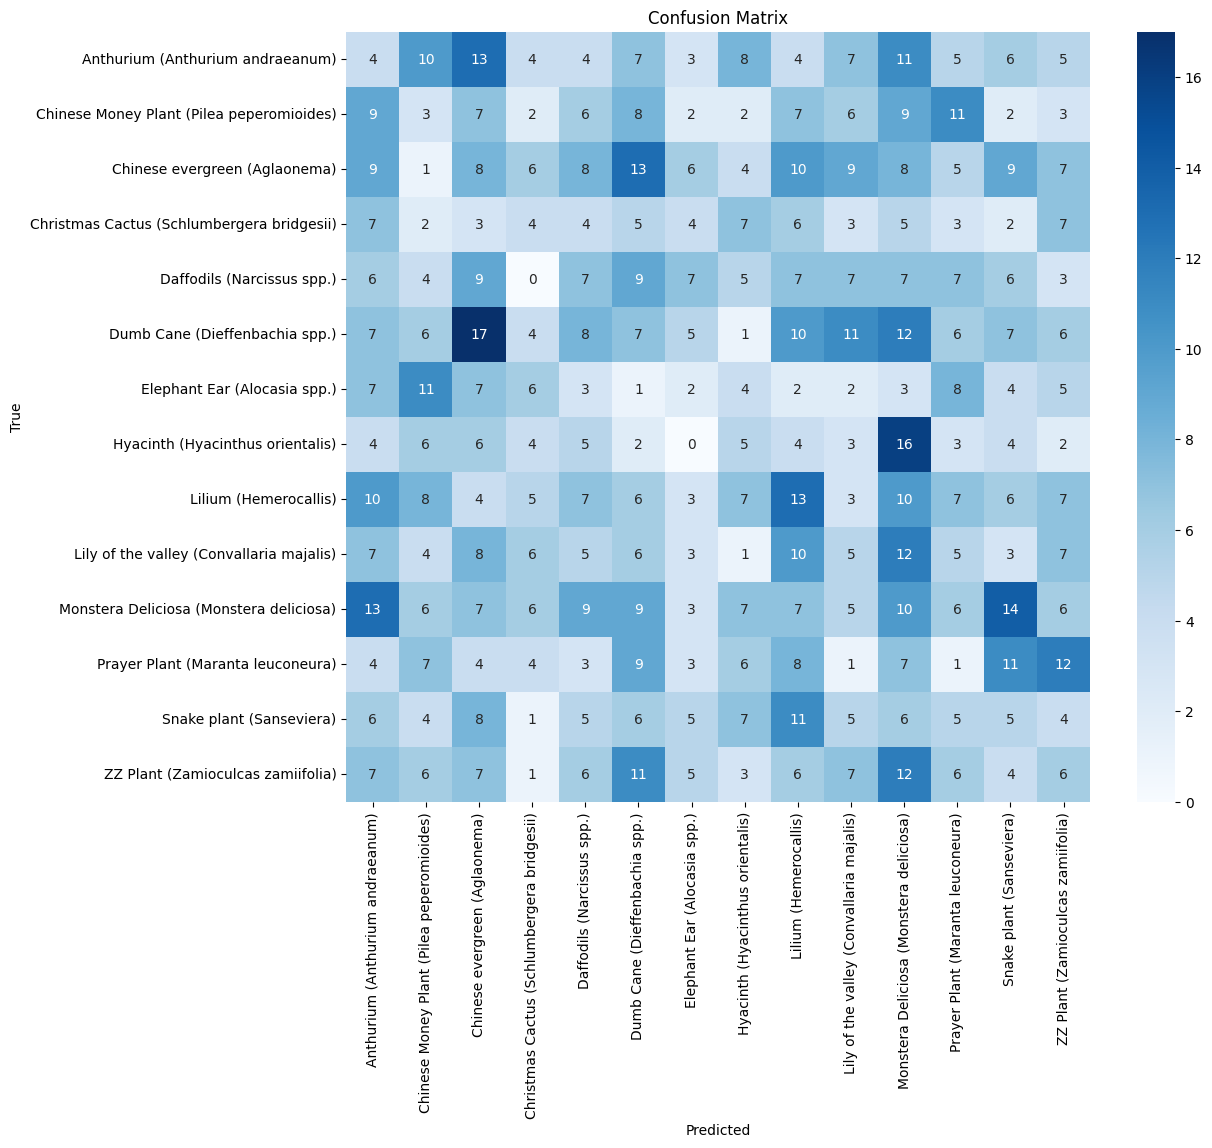

In [12]:
# Making confusion matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1) 
y_true = test_generator.classes  
class_names = list(test_generator.class_indices.keys()) 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
pip install Image

In [ ]:
pip install SciPy

In [ ]:
conda install -c conda-forge scikit-learn

In [7]:
import sklearn

In [9]:
pip install matplotlib


   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ------------ --------------------------- 2.4/7.5 MB 13.4 MB/s eta 0:00:01
   -------------------------- ------------- 5.0/7.5 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------  7.3/7.5 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 11.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 10.2 MB/s eta 0:00:00


In [ ]:
pip install numpy


In [11]:
pip install seaborn


   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.8 MB 4.6 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/10.8 MB 5.6 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/10.8 MB 6.2 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/10.8 MB 6.2 MB/s eta 0:00:01
   ----------------------- ---------------- 6.3/10.8 MB 5.8 MB/s eta 0:00:01
   --------------------------- ------------ 7.3/10.8 MB 5.7 MB/s eta 0:00:01
   -------------------------------- ------- 8.7/10.8 MB 5.7 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/10.8 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 10.8/10.8 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Measuring accuracy on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

 2/37 [>.............................] - ETA: 39s - loss: 0.4990 - accuracy: 0.8281 

C:\Users\milan\anaconda3\envs\tensorflow\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


37/37 [==============================] - 40s 1s/step - loss: 0.4295 - accuracy: 0.8514
Test Accuracy: 0.8513513803482056


In [10]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
from collections import Counter
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Fine tuning with additional 30 epochs

# Early stopping: Stops training when the validation loss stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor validation loss
    patience=5,  # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restores model weights from the epoch with the best `val_loss`
)

# Learning rate reduction: Reduces the learning rate when validation loss stops improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor validation loss
    factor=0.5,  # Factor by which the learning rate will be reduced
    patience=3,  # Number of epochs with no improvement before reducing the learning rate
    min_lr=1e-6  # Minimum learning rate to which it can be reduced
)

# Train the model using the training generator and validate on the test generator
history = model.fit(
    train_generator,  # Data generator for training images
    validation_data=test_generator,  # Data generator for validation test images
    epochs=30,  # Maximum number of training epochs
    callbacks=[early_stopping, reduce_lr]  # List of callbacks to apply during training
    # early_stopping: stops training early if no improvement is detected
    # reduce_lr: dynamically adjusts learning rate to improve convergence
)

Epoch 1/30
111/111 [==============================] - 458s 4s/step - loss: 0.8028 - accuracy: 0.7452 - val_loss: 0.4199 - val_accuracy: 0.8590
Epoch 2/30
111/111 [==============================] - 530s 5s/step - loss: 0.6901 - accuracy: 0.7769 - val_loss: 0.4191 - val_accuracy: 0.8606
Epoch 3/30
111/111 [==============================] - 535s 5s/step - loss: 0.6302 - accuracy: 0.7913 - val_loss: 0.4035 - val_accuracy: 0.8640
Epoch 4/30
111/111 [==============================] - 361s 3s/step - loss: 0.6009 - accuracy: 0.7981 - val_loss: 0.4064 - val_accuracy: 0.8632
Epoch 5/30
111/111 [==============================] - 366s 3s/step - loss: 0.5401 - accuracy: 0.8215 - val_loss: 0.3984 - val_accuracy: 0.8699
Epoch 6/30
111/111 [==============================] - 367s 3s/step - loss: 0.5208 - accuracy: 0.8264 - val_loss: 0.3976 - val_accuracy: 0.8716
Epoch 7/30
111/111 [==============================] - 421s 4s/step - loss: 0.5033 - accuracy: 0.8320 - val_loss: 0.3872 - val_accuracy: 0.8691

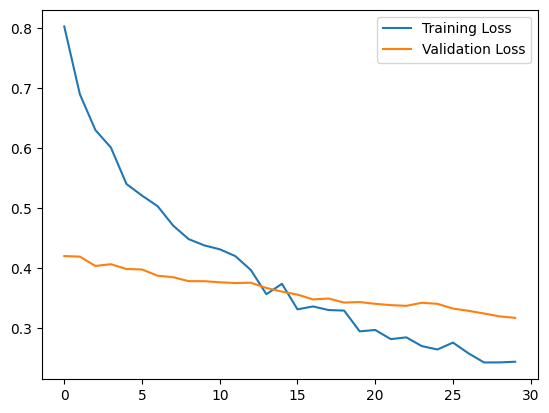

In [20]:
import matplotlib.pyplot as plt

# evaluating training and validation losses to ensure validation losss decreases
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [13]:
# measuring accuracy on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

14/37 [==========>...................] - ETA: 41s - loss: 0.3021 - accuracy: 0.9040

C:\Users\milan\anaconda3\envs\tensorflow\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


37/37 [==============================] - 64s 2s/step - loss: 0.3169 - accuracy: 0.8970
Test Accuracy: 0.8969594836235046


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision, Recall, F1-Score
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = test_generator.classes


precision = precision_score(y_true, y_pred, average='micro')
print(f"Precision: {precision}")

recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')


print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


C:\Users\milan\anaconda3\envs\tensorflow\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Precision: 0.06756756756756757
Recall: 0.06756756756756757
F1-Score: 0.06750568832092443


In [29]:
# Check which layers a
for layer in model.layers:
    print(f"Layer: {layer.name}, Trainable: {layer.trainable}")


Layer: input_1, Trainable: True
Layer: Conv1, Trainable: True
Layer: bn_Conv1, Trainable: True
Layer: Conv1_relu, Trainable: True
Layer: expanded_conv_depthwise, Trainable: True
Layer: expanded_conv_depthwise_BN, Trainable: True
Layer: expanded_conv_depthwise_relu, Trainable: True
Layer: expanded_conv_project, Trainable: True
Layer: expanded_conv_project_BN, Trainable: True
Layer: block_1_expand, Trainable: True
Layer: block_1_expand_BN, Trainable: True
Layer: block_1_expand_relu, Trainable: True
Layer: block_1_pad, Trainable: True
Layer: block_1_depthwise, Trainable: True
Layer: block_1_depthwise_BN, Trainable: True
Layer: block_1_depthwise_relu, Trainable: True
Layer: block_1_project, Trainable: True
Layer: block_1_project_BN, Trainable: True
Layer: block_2_expand, Trainable: True
Layer: block_2_expand_BN, Trainable: True
Layer: block_2_expand_relu, Trainable: True
Layer: block_2_depthwise, Trainable: True
Layer: block_2_depthwise_BN, Trainable: True
Layer: block_2_depthwise_relu, Tr

In [30]:
for layer in model.layers[:100]:  # Freeze first 100 layers
    layer.trainable = False
for layer in model.layers[100:]:  # Fine-tune remaining layers
    layer.trainable = True


In [31]:
for layer in model.layers:
    print(f"Layer: {layer.name}, Trainable: {layer.trainable}")


Layer: input_1, Trainable: False
Layer: Conv1, Trainable: False
Layer: bn_Conv1, Trainable: False
Layer: Conv1_relu, Trainable: False
Layer: expanded_conv_depthwise, Trainable: False
Layer: expanded_conv_depthwise_BN, Trainable: False
Layer: expanded_conv_depthwise_relu, Trainable: False
Layer: expanded_conv_project, Trainable: False
Layer: expanded_conv_project_BN, Trainable: False
Layer: block_1_expand, Trainable: False
Layer: block_1_expand_BN, Trainable: False
Layer: block_1_expand_relu, Trainable: False
Layer: block_1_pad, Trainable: False
Layer: block_1_depthwise, Trainable: False
Layer: block_1_depthwise_BN, Trainable: False
Layer: block_1_depthwise_relu, Trainable: False
Layer: block_1_project, Trainable: False
Layer: block_1_project_BN, Trainable: False
Layer: block_2_expand, Trainable: False
Layer: block_2_expand_BN, Trainable: False
Layer: block_2_expand_relu, Trainable: False
Layer: block_2_depthwise, Trainable: False
Layer: block_2_depthwise_BN, Trainable: False
Layer: blo